<hr style="color:green" />
<h1 style="color:green">COSC2673 Assignment 2: Image Classification for Cancerous Cells</h1>
<h2 style="color:green">File 03: Basic Tensorflow model test on Main data for Binary classification</h2>
<hr style="color:green" />

<p>
In this file, load the image dataset for the main labels, and try a basic binary classification according to the isCancerous flag
</p>

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

from PIL import Image
import glob

import pandas as pd


import data_basic_utility as dbutil
import graphing_utility as graphutil
import statistics_utility as statsutil

tf.__version__
randomSeed = dbutil.get_random_seed()

c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\nelso\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
dfImages = pd.read_csv("images_main.csv")

In [3]:
# Get The training Split and the Validation Split, then drop the cell type label and the split flag
dfImagesTrain = dfImages[dfImages["trainValTest"] == 0]
dfImagesVal = dfImages[dfImages["trainValTest"] == 1]

dfImagesTrain = dfImagesTrain.drop(["cellType", "trainValTest"], axis=1)
dfImagesVal = dfImagesVal.drop(["cellType", "trainValTest"], axis=1)

dfImagesTrain.head()

,ImageName,isCancerous
0,./Image_classification_data/patch_images\1.png,0
1,./Image_classification_data/patch_images\10.png,0
3,./Image_classification_data/patch_images\1000.png,1
4,./Image_classification_data/patch_images\10000...,0
5,./Image_classification_data/patch_images\10001...,0


Setup our Layer Configuration

In [4]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

Create a basic Tensorflow model with one hidden layer

In [5]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

Review the Summary of the model

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 560,642
Trainable params: 560,642
Non-trainable params: 0
_________________________________________________________________


The `tf.keras.utils.plot_model` shows the model as a figure

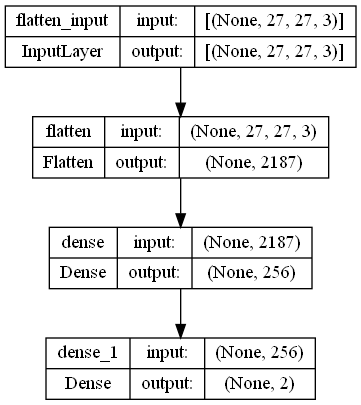

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

Compile the model

In [8]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])